In [1]:
# Data cleaning with python and pandas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# create pandas dataframe to read the csv file
df = pd.read_csv(r"C:\Users\sneha\OneDrive\Desktop\call_center\Call Center_dataset.csv")

In [3]:
df.dtypes

Id                           object
Call Timestamp               object
Call-Centres City            object
Channel                      object
City                         object
Customer Name                object
Reason                       object
Response Time                object
Sentiment                    object
State                        object
Call Duration In Minutes      int64
Csat Score                  float64
dtype: object

In [4]:
df.describe()

,Call Duration In Minutes,Csat Score
count,32941.000000,12271.000000
mean,25.021159,5.548448
std,11.816218,2.371059
min,5.000000,1.000000
25%,15.000000,4.000000
50%,25.000000,5.000000
75%,35.000000,7.000000
max,45.000000,10.000000


In [5]:
df.head()

,Id,Call Timestamp,Call-Centres City,Channel,City,Customer Name,Reason,Response Time,Sentiment,State,Call Duration In Minutes,Csat Score
0,DKK-57076809-w-055481-fU,29-10-2020,Los Angeles,Call-Center,Detroit,Analise Gairdner,Billing Question,Within SLA,Neutral,Michigan,17,7.0
1,QGK-72219678-w-102139-KY,05-10-2020,Baltimore,Chatbot,Spartanburg,Crichton Kidsley,Service Outage,Within SLA,Very Positive,South Carolina,23,NaN
2,GYJ-30025932-A-023015-LD,04-10-2020,Los Angeles,Call-Center,Gainesville,Averill Brundrett,Billing Question,Above SLA,Negative,Florida,45,NaN
3,ZJI-96807559-i-620008-m7,17-10-2020,Los Angeles,Chatbot,Portland,Noreen Lafflina,Billing Question,Within SLA,Very Negative,Oregon,12,1.0
4,DDU-69451719-O-176482-Fm,17-10-2020,Los Angeles,Call-Center,Fort Wayne,Toma Van der Beken,Payments,Within SLA,Very Positive,Indiana,23,NaN


In [6]:
#finding missing values 
missing_counts = df.isnull().sum()
missing_counts

Id                              0
Call Timestamp                  0
Call-Centres City               0
Channel                         0
City                            0
Customer Name                   0
Reason                          0
Response Time                   0
Sentiment                       0
State                           0
Call Duration In Minutes        0
Csat Score                  20670
dtype: int64

In [7]:
df.isna().any()

Id                          False
Call Timestamp              False
Call-Centres City           False
Channel                     False
City                        False
Customer Name               False
Reason                      False
Response Time               False
Sentiment                   False
State                       False
Call Duration In Minutes    False
Csat Score                   True
dtype: bool

<Axes: >

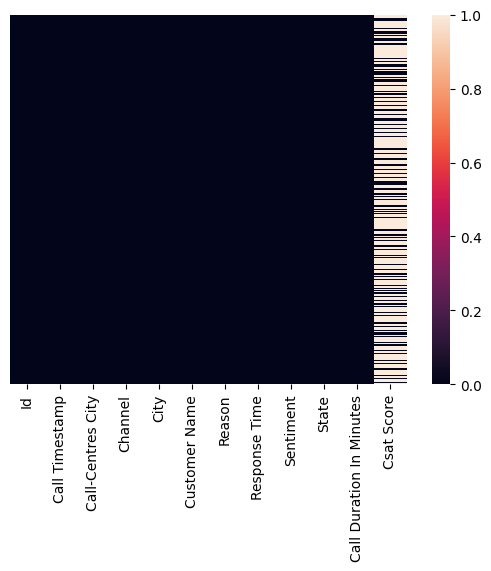

In [8]:
sns.heatmap(df.isnull(), yticklabels=False)

In [9]:
# 1. Handle Missing Values
# For simplicity, let's fill missing 'Csat Score' with the median score.
median_csat_score = df['Csat Score'].median()
df['Csat Score']=df['Csat Score'].fillna(median_csat_score)

In [10]:
# 2. Convert Data Types
# Convert 'Csat Score' to integer
df['Csat Score'] = df['Csat Score'].astype('int64')
#Convert string to Datetime
df['Call Timestamp'] = pd.to_datetime(df['Call Timestamp'], format='%d-%m-%Y')

In [11]:
df.dtypes

Id                                  object
Call Timestamp              datetime64[ns]
Call-Centres City                   object
Channel                             object
City                                object
Customer Name                       object
Reason                              object
Response Time                       object
Sentiment                           object
State                               object
Call Duration In Minutes             int64
Csat Score                           int64
dtype: object

In [12]:
# 3. Standardize Column Names
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [13]:
# 4. Remove Duplicates
df.drop_duplicates(inplace=True)

In [14]:
# Display the cleaned data
df

,id,call_timestamp,call-centres_city,channel,city,customer_name,reason,response_time,sentiment,state,call_duration_in_minutes,csat_score
0,DKK-57076809-w-055481-fU,2020-10-29,Los Angeles,Call-Center,Detroit,Analise Gairdner,Billing Question,Within SLA,Neutral,Michigan,17,7
1,QGK-72219678-w-102139-KY,2020-10-05,Baltimore,Chatbot,Spartanburg,Crichton Kidsley,Service Outage,Within SLA,Very Positive,South Carolina,23,5
2,GYJ-30025932-A-023015-LD,2020-10-04,Los Angeles,Call-Center,Gainesville,Averill Brundrett,Billing Question,Above SLA,Negative,Florida,45,5
3,ZJI-96807559-i-620008-m7,2020-10-17,Los Angeles,Chatbot,Portland,Noreen Lafflina,Billing Question,Within SLA,Very Negative,Oregon,12,1
4,DDU-69451719-O-176482-Fm,2020-10-17,Los Angeles,Call-Center,Fort Wayne,Toma Van der Beken,Payments,Within SLA,Very Positive,Indiana,23,5
...,...,...,...,...,...,...,...,...,...,...,...,...
32936,IBZ-31554817-e-308536-ce,2020-10-03,Los Angeles,Web,Amarillo,Jimmy Lewer,Service Outage,Within SLA,Very Positive,Texas,39,10
32937,ZGB-67012647-l-746192-D4,2020-10-11,Los Angeles,Web,Alexandria,Amanda Sijmons,Service Outage,Within SLA,Very Positive,Virginia,26,10
32938,UGZ-65514208-Y-431082-Vt,2020-10-14,Los Angeles,Web,Boise,Prudy Sheppard,Service Outage,Within SLA,Very Positive,Idaho,8,10
32939,KFH-61834342-f-122443-Md,2020-10-15,Los Angeles,Web,Buffalo,Gloriana Haythorne,Service Outage,Within SLA,Very Positive,New York,25,10


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32941 entries, 0 to 32940
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        32941 non-null  object        
 1   call_timestamp            32941 non-null  datetime64[ns]
 2   call-centres_city         32941 non-null  object        
 3   channel                   32941 non-null  object        
 4   city                      32941 non-null  object        
 5   customer_name             32941 non-null  object        
 6   reason                    32941 non-null  object        
 7   response_time             32941 non-null  object        
 8   sentiment                 32941 non-null  object        
 9   state                     32941 non-null  object        
 10  call_duration_in_minutes  32941 non-null  int64         
 11  csat_score                32941 non-null  int64         
dtypes: datetime64[ns](

In [16]:
# Save DataFrame to CSV
df.to_csv('clean_callcenter_data.csv', index=False)


In [17]:
df1=pd.read_csv('clean_callcenter_data.csv')
df1

,id,call_timestamp,call-centres_city,channel,city,customer_name,reason,response_time,sentiment,state,call_duration_in_minutes,csat_score
0,DKK-57076809-w-055481-fU,2020-10-29,Los Angeles,Call-Center,Detroit,Analise Gairdner,Billing Question,Within SLA,Neutral,Michigan,17,7
1,QGK-72219678-w-102139-KY,2020-10-05,Baltimore,Chatbot,Spartanburg,Crichton Kidsley,Service Outage,Within SLA,Very Positive,South Carolina,23,5
2,GYJ-30025932-A-023015-LD,2020-10-04,Los Angeles,Call-Center,Gainesville,Averill Brundrett,Billing Question,Above SLA,Negative,Florida,45,5
3,ZJI-96807559-i-620008-m7,2020-10-17,Los Angeles,Chatbot,Portland,Noreen Lafflina,Billing Question,Within SLA,Very Negative,Oregon,12,1
4,DDU-69451719-O-176482-Fm,2020-10-17,Los Angeles,Call-Center,Fort Wayne,Toma Van der Beken,Payments,Within SLA,Very Positive,Indiana,23,5
...,...,...,...,...,...,...,...,...,...,...,...,...
32936,IBZ-31554817-e-308536-ce,2020-10-03,Los Angeles,Web,Amarillo,Jimmy Lewer,Service Outage,Within SLA,Very Positive,Texas,39,10
32937,ZGB-67012647-l-746192-D4,2020-10-11,Los Angeles,Web,Alexandria,Amanda Sijmons,Service Outage,Within SLA,Very Positive,Virginia,26,10
32938,UGZ-65514208-Y-431082-Vt,2020-10-14,Los Angeles,Web,Boise,Prudy Sheppard,Service Outage,Within SLA,Very Positive,Idaho,8,10
32939,KFH-61834342-f-122443-Md,2020-10-15,Los Angeles,Web,Buffalo,Gloriana Haythorne,Service Outage,Within SLA,Very Positive,New York,25,10


In [18]:
#ANALYSIS

In [19]:
#Data analysis using duckdb
!pip install duckdb
import duckdb

Defaulting to user installation because normal site-packages is not writeable


In [20]:
duckdb.sql('CREATE TABLE call_center AS SELECT * FROM "clean_callcenter_data.csv"')

In [21]:
#1. Analyze Percentage of Reason of Call 
duckdb.sql( """
SELECT 
    reason,
    COUNT(*) AS count,
    ROUND((COUNT(*) * 100.0 / (SELECT COUNT(*) FROM call_center)), 2) AS percentage
FROM 
    call_center
GROUP BY 
    reason;
""")


┌──────────────────┬───────┬────────────┐
│      reason      │ count │ percentage │
│     varchar      │ int64 │   double   │
├──────────────────┼───────┼────────────┤
│ Service Outage   │  4730 │      14.36 │
│ Billing Question │ 23462 │      71.22 │
│ Payments         │  4749 │      14.42 │
└──────────────────┴───────┴────────────┘

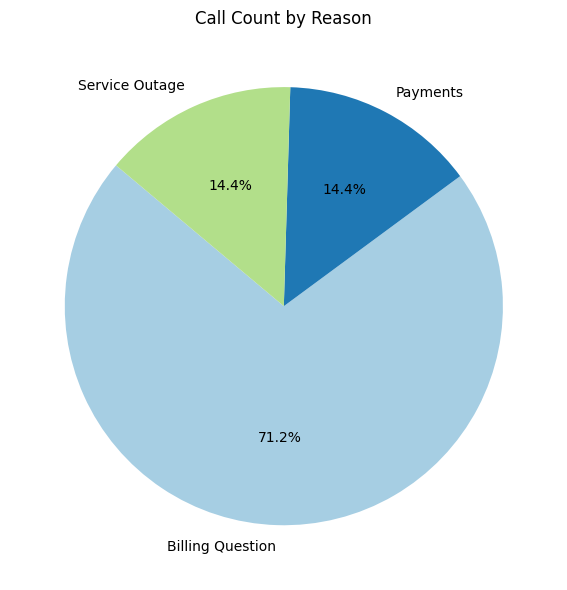

In [22]:
# Create pie chart for call count by reason
data = {
    'reason': ['Billing Question', 'Payments', 'Service Outage'],
    'count': [23462, 4749, 4730],
    'percentage': [71.22, 14.42, 14.36]
}

df = pd.DataFrame(data)

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(df['count'], labels=df['reason'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(df))))
plt.title('Call Count by Reason')

plt.tight_layout()
plt.savefig('call_count_by_reason_pie.png')
plt.show()


In [23]:
#2. Analyze Call Volume by Day of the Week
duckdb.sql("""
SELECT 
    CASE EXTRACT(DOW FROM call_timestamp)
        WHEN 0 THEN 'Sunday'
        WHEN 1 THEN 'Monday'
        WHEN 2 THEN 'Tuesday'
        WHEN 3 THEN 'Wednesday'
        WHEN 4 THEN 'Thursday'
        WHEN 5 THEN 'Friday'
        WHEN 6 THEN 'Saturday'
    END AS day_of_week,
    COUNT(*) AS call_count
FROM 
    call_center
GROUP BY 
    EXTRACT(DOW FROM call_timestamp)
ORDER BY EXTRACT(DOW FROM call_timestamp);
""")

┌─────────────┬────────────┐
│ day_of_week │ call_count │
│   varchar   │   int64    │
├─────────────┼────────────┤
│ Sunday      │       4296 │
│ Monday      │       4334 │
│ Tuesday     │       4408 │
│ Wednesday   │       4449 │
│ Thursday    │       5481 │
│ Friday      │       5570 │
│ Saturday    │       4403 │
└─────────────┴────────────┘

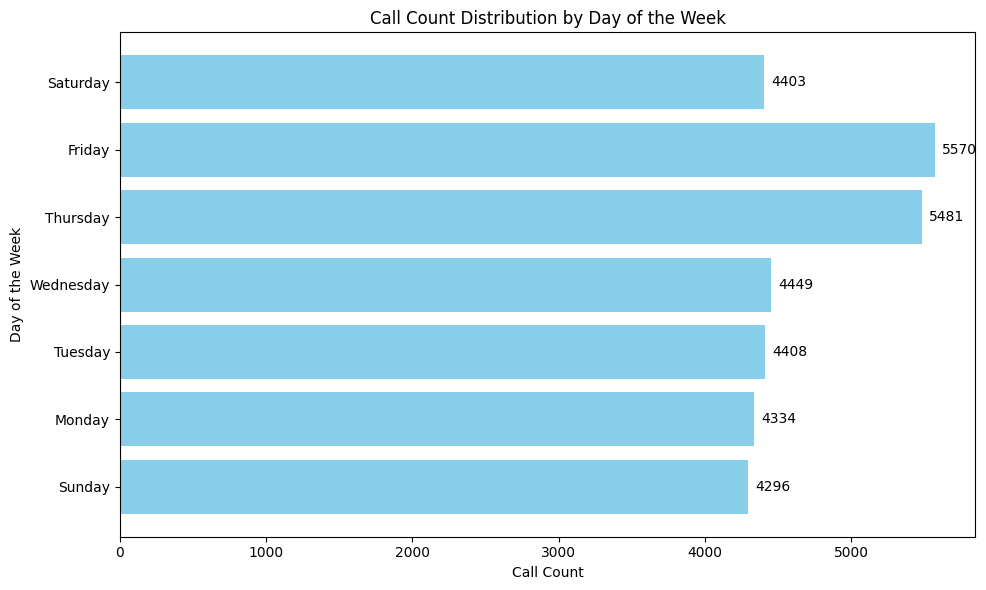

In [24]:
data = {
    'day_of_week': ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'],
    'call_count': [4296, 4334, 4408, 4449, 5481, 5570, 4403]
}

df = pd.DataFrame(data)

# Create horizontal bar plot
plt.figure(figsize=(10, 6))
bars = plt.barh(df['day_of_week'], df['call_count'], color='skyblue')

# Add value labels on the right of the bars
for bar in bars:
    plt.text(
        bar.get_width() + 50,  # x-coordinate (value + offset for space)
        bar.get_y() + bar.get_height() / 2,  # y-coordinate (center of the bar)
        f'{int(bar.get_width())}',  # text to display (the bar width)
        va='center',  # vertical alignment
        ha='left'  # horizontal alignment
    )

plt.xlabel('Call Count')
plt.ylabel('Day of the Week')
plt.title('Call Count Distribution by Day of the Week')
plt.tight_layout()
plt.savefig('call_count_bar_chart_with_values.png')
plt.show()

In [25]:
#3. Analyze Average CSAT Score by Sentiment and City
duckdb.sql("""
SELECT 
    "call-centres_city",
    sentiment,
    COUNT(*) AS count,
    ROUND(AVG(csat_score)) AS average_csat_score
FROM 
    call_center
GROUP BY 
    "call-centres_city", sentiment
ORDER BY 
    "call-centres_city", sentiment;

""")

┌───────────────────┬───────────────┬───────┬────────────────────┐
│ call-centres_city │   sentiment   │ count │ average_csat_score │
│      varchar      │    varchar    │ int64 │       double       │
├───────────────────┼───────────────┼───────┼────────────────────┤
│ Baltimore         │ Negative      │  3711 │                5.0 │
│ Baltimore         │ Neutral       │  2927 │                6.0 │
│ Baltimore         │ Positive      │  1289 │                6.0 │
│ Baltimore         │ Very Negative │  2025 │                4.0 │
│ Baltimore         │ Very Positive │  1060 │                7.0 │
│ Chicago           │ Negative      │  1839 │                5.0 │
│ Chicago           │ Neutral       │  1445 │                6.0 │
│ Chicago           │ Positive      │   634 │                6.0 │
│ Chicago           │ Very Negative │   972 │                4.0 │
│ Chicago           │ Very Positive │   529 │                7.0 │
│ Denver            │ Negative      │   912 │                5

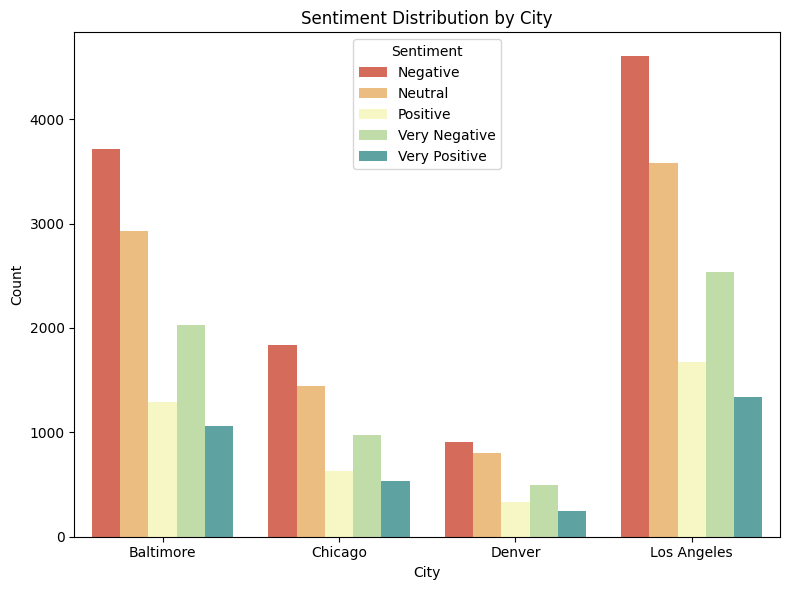

In [26]:
# Bar Chart for Sentiment Distribution by City
data = {
    'call_centres_city': ['Baltimore', 'Baltimore', 'Baltimore', 'Baltimore', 'Baltimore',
                          'Chicago', 'Chicago', 'Chicago', 'Chicago', 'Chicago',
                          'Denver', 'Denver', 'Denver', 'Denver', 'Denver',
                          'Los Angeles', 'Los Angeles', 'Los Angeles', 'Los Angeles', 'Los Angeles'],
    'sentiment': ['Negative', 'Neutral', 'Positive', 'Very Negative', 'Very Positive',
                  'Negative', 'Neutral', 'Positive', 'Very Negative', 'Very Positive',
                  'Negative', 'Neutral', 'Positive', 'Very Negative', 'Very Positive',
                  'Negative', 'Neutral', 'Positive', 'Very Negative', 'Very Positive'],
    'count': [3711, 2927, 1289, 2025, 1060, 1839, 1445, 634, 972, 529,
              912, 800, 329, 492, 243, 4601, 3582, 1676, 2537, 1338],
    'average_csat_score': [5.0, 6.0, 6.0, 4.0, 7.0, 5.0, 6.0, 6.0, 4.0, 7.0,
                           5.0, 6.0, 6.0, 4.0, 7.0, 5.0, 6.0, 6.0, 4.0, 7.0]
}
# creating a dataframe 
df = pd.DataFrame(data)
# creating a bar plot 
plt.figure(figsize=(8, 6))
sns.barplot(x='call_centres_city', y='count', hue='sentiment', data=df, palette='Spectral')
plt.title('Sentiment Distribution by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.savefig('sentiment_distribution_by_city.png')
plt.show()

In [27]:
#4. Analyze Call Centers Calls Number On the Basis of response time
duckdb.sql("""
SELECT 
    response_time,
    COUNT(*) AS count,
    ROUND((COUNT(*) * 100.0 / (SELECT COUNT(*) FROM call_center)), 2) AS percentage
FROM 
    call_center
GROUP BY 
    response_time;
""")

┌───────────────┬───────┬────────────┐
│ response_time │ count │ percentage │
│    varchar    │ int64 │   double   │
├───────────────┼───────┼────────────┤
│ Within SLA    │ 20625 │      62.61 │
│ Above SLA     │  4168 │      12.65 │
│ Below SLA     │  8148 │      24.74 │
└───────────────┴───────┴────────────┘

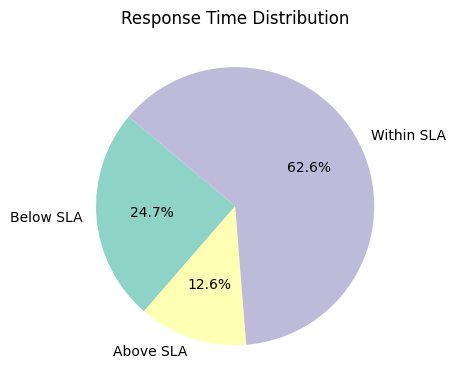

In [28]:
data = {
    'response_time': ['Below SLA', 'Above SLA', 'Within SLA'],
    'count': [8148, 4168, 20625],
    'percentage': [24.74, 12.65, 62.61]
}
# creating a dataframe 
df = pd.DataFrame(data)
# Creating a Pie Chart 
plt.figure(figsize=(6, 4))
plt.pie(df['percentage'], labels=df['response_time'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Response Time Distribution')
plt.tight_layout()
plt.savefig('response_time_distribution_pie_chart.png')
plt.show()

In [29]:
#5.Analyze Call Volume By Using different Channel
duckdb.sql("""
SELECT 
    channel,
    COUNT(*) AS call_count
FROM 
    call_center
GROUP BY 
    channel
ORDER BY 
    call_count DESC;
""")

┌─────────────┬────────────┐
│   channel   │ call_count │
│   varchar   │   int64    │
├─────────────┼────────────┤
│ Call-Center │      10639 │
│ Chatbot     │       8256 │
│ Email       │       7470 │
│ Web         │       6576 │
└─────────────┴────────────┘

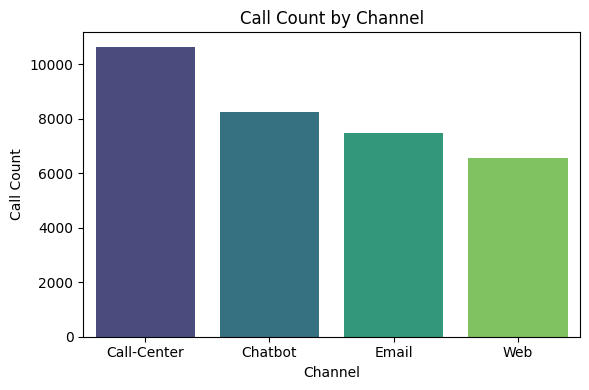

In [30]:
data = {
    'channel': ['Call-Center', 'Chatbot', 'Email', 'Web'],
    'call_count': [10639, 8256, 7470, 6576]
}

# Create DataFrame
df = pd.DataFrame(data)

# Creating a Bar Chart with hue
plt.figure(figsize=(6, 4))
sns.barplot(x='channel', y='call_count', data=df, hue='channel', palette='viridis', dodge=False)
plt.title('Call Count by Channel')
plt.xlabel('Channel')
plt.ylabel('Call Count')
plt.tight_layout()

# Save Figure
plt.savefig('call_count_by_channel.png')

# Show Plot
plt.show()
